In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import shapiro,wilcoxon,ttest_1samp,ttest_ind,ttest_rel,skew
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency,chisquare

# Case Study - covering all Stats

In [3]:
df=pd.read_csv('Bank-1.csv')
df

,User I.D,Age,Income,Income2,Deposit,Deposit2,Customer_type,Deposit_Scheme
0,ACX570081,26,32900,20230,14805.0,11935.7,Irregular,Hal-Yearly
1,ACX570082,43,37390,21410,19442.8,10276.8,Regular,Quaterly
2,ACX570083,35,11300,22290,5989.0,9361.8,Irregular,Monthly
3,ACX570084,27,41680,26970,19589.6,15912.3,Irregular,Quaterly
4,ACX570085,42,27170,27220,14943.5,11160.2,Regular,Quaterly
...,...,...,...,...,...,...,...,...
259,ACX570326,28,35350,22240,15907.5,9785.6,Irregular,Yearly
260,ACX570327,36,21500,34410,10535.0,17893.2,Regular,Quaterly
261,ACX570328,25,27840,24250,16425.6,10427.5,Irregular,Quaterly
262,ACX570329,36,38530,26800,18494.4,11256.0,Regular,Quaterly


In [4]:
df.describe()

,Age,Income,Income2,Deposit,Deposit2
count,264.000000,264.000000,264.000000,264.000000,264.000000
mean,35.143939,30104.583333,25014.545455,15601.345076,12915.172348
std,6.045622,9383.489941,5079.402956,5184.112352,3038.508903
min,16.000000,5110.000000,11200.000000,2606.100000,5104.000000
25%,31.000000,24207.500000,21797.500000,11934.975000,10554.575000
50%,35.000000,30360.000000,25160.000000,15561.100000,12881.200000
75%,39.000000,36132.500000,28532.500000,19049.375000,15140.825000
max,49.000000,57000.000000,38300.000000,31920.000000,21065.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User I.D        264 non-null    object 
 1   Age             264 non-null    int64  
 2   Income          264 non-null    int64  
 3   Income2         264 non-null    int64  
 4   Deposit         264 non-null    float64
 5   Deposit2        264 non-null    float64
 6   Customer_type   264 non-null    object 
 7   Deposit_Scheme  264 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 16.6+ KB


In [7]:
df.shape

(264, 8)

Q1: In the manager’s report, it is mentioned that the average Age of the Customers is 35.

This is 1-sample mean test

In [8]:
from scipy.stats import shapiro

In [9]:
df['Age']

0      26
1      43
2      35
3      27
4      42
       ..
259    28
260    36
261    25
262    36
263    49
Name: Age, Length: 264, dtype: int64

In [11]:
# normality test
stat, p = shapiro(df['Age'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample is from Normal Population (fail to reject H0)')
else:
    print('Samples is not from Normal Population (reject H0)')

#Sample follows normal distribution

Statistics=0.993, p=0.220
Sample is from Normal Population (fail to reject H0)


In [12]:
ttest_1samp(df['Age'],35)

Ttest_1sampResult(statistic=0.38684825882837526, pvalue=0.6991813724146171)

In [ ]:
pvalue=0.6991813724146171 >0.05 , so Null hypothesis holds good.

#So Sample represent the Mean Age. Manager expectations macthes. So Sample also represents the Population

In [13]:
df

,User I.D,Age,Income,Income2,Deposit,Deposit2,Customer_type,Deposit_Scheme
0,ACX570081,26,32900,20230,14805.0,11935.7,Irregular,Hal-Yearly
1,ACX570082,43,37390,21410,19442.8,10276.8,Regular,Quaterly
2,ACX570083,35,11300,22290,5989.0,9361.8,Irregular,Monthly
3,ACX570084,27,41680,26970,19589.6,15912.3,Irregular,Quaterly
4,ACX570085,42,27170,27220,14943.5,11160.2,Regular,Quaterly
...,...,...,...,...,...,...,...,...
259,ACX570326,28,35350,22240,15907.5,9785.6,Irregular,Yearly
260,ACX570327,36,21500,34410,10535.0,17893.2,Regular,Quaterly
261,ACX570328,25,27840,24250,16425.6,10427.5,Irregular,Quaterly
262,ACX570329,36,38530,26800,18494.4,11256.0,Regular,Quaterly


In [14]:
# normality test
stat, p = shapiro(df['Income'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample is from Normal Population (fail to reject H0)')
else:
    print('Samples is not from Normal Population (reject H0)')

Statistics=0.998, p=0.987
Sample is from Normal Population (fail to reject H0)


In [21]:
ttest_1samp(df['Income'],40000)

#Rejects the Null hypo
#Inference - So Population average(mean) Income is not 40000

Ttest_1sampResult(statistic=-17.134508702826132, pvalue=1.0354363597848094e-44)

In [24]:
#Post hoc

In [25]:
np.mean(df['Income'])

30104.583333333332

In [26]:
#The expectations would match at 30000. so here exepctations from manager is worng
ttest_1samp(df['Income'],30000)


Ttest_1sampResult(statistic=0.18109232744154738, pvalue=0.8564345845395784)

In [28]:
df.head(2)

,User I.D,Age,Income,Income2,Deposit,Deposit2,Customer_type,Deposit_Scheme
0,ACX570081,26,32900,20230,14805.0,11935.7,Irregular,Hal-Yearly
1,ACX570082,43,37390,21410,19442.8,10276.8,Regular,Quaterly


In [30]:
bins = [0, 18, 24, 30, 40, 48, np.inf]
names = ["Group-A", "Group-B", "Group-C", "Group-D" , "Group-E" , "Group-F" ]

df['Age_Group'] = pd.cut(df.Age, bins, labels=names)


In [32]:
df.head()

,User I.D,Age,Income,Income2,Deposit,Deposit2,Customer_type,Deposit_Scheme,Age_Group
0,ACX570081,26,32900,20230,14805.0,11935.7,Irregular,Hal-Yearly,Group-C
1,ACX570082,43,37390,21410,19442.8,10276.8,Regular,Quaterly,Group-E
2,ACX570083,35,11300,22290,5989.0,9361.8,Irregular,Monthly,Group-D
3,ACX570084,27,41680,26970,19589.6,15912.3,Irregular,Quaterly,Group-C
4,ACX570085,42,27170,27220,14943.5,11160.2,Regular,Quaterly,Group-E


In [ ]:
Q3 contd Now the bank wants the see the variation of average income over different age group


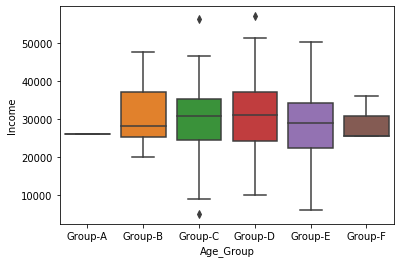

In [33]:
sns.boxplot(x='Age_Group',y='Income',data=df)
plt.show()

In [ ]:
This question we use statistical test - ANOVA. bcoz we have multiple groups A-F and other is continonus 

In [34]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm

In [35]:
mod=ols('Income ~ Age_Group',data=df).fit()
aov_table=sm.stats.anova_lm(mod,typ=2)
print(aov_table)

                 sum_sq     df         F    PR(>F)
Age_Group  1.806153e+08    5.0  0.405621  0.844716
Residual   2.297650e+10  258.0       NaN       NaN


In [36]:
df.head()

,User I.D,Age,Income,Income2,Deposit,Deposit2,Customer_type,Deposit_Scheme,Age_Group
0,ACX570081,26,32900,20230,14805.0,11935.7,Irregular,Hal-Yearly,Group-C
1,ACX570082,43,37390,21410,19442.8,10276.8,Regular,Quaterly,Group-E
2,ACX570083,35,11300,22290,5989.0,9361.8,Irregular,Monthly,Group-D
3,ACX570084,27,41680,26970,19589.6,15912.3,Irregular,Quaterly,Group-C
4,ACX570085,42,27170,27220,14943.5,11160.2,Regular,Quaterly,Group-E


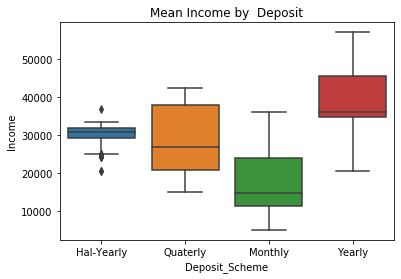

In [39]:
sns.boxplot(x = "Deposit_Scheme", y = "Income", data = df)
plt.title('Mean Income by  Deposit')
plt.show()


In [37]:
mod=ols('Income ~ Deposit_Scheme',data=df).fit()
aov_table=sm.stats.anova_lm(mod,typ=2)
print(aov_table)

                      sum_sq     df         F        PR(>F)
Deposit_Scheme  7.799853e+09    3.0  44.01742  4.891310e-23
Residual        1.535727e+10  260.0       NaN           NaN


In [ ]:
#Applicable for Anova only and not chisquare - For stats verifications

In [41]:
#See at 1:30:00

from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(df['Income'],df['Deposit_Scheme']))


        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1    group2   meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------------
Hal-Yearly  Monthly -11265.787  0.001 -15750.5592 -6781.0149   True
Hal-Yearly Quaterly -1084.7775 0.7602   -4081.533  1911.9779  False
Hal-Yearly   Yearly  9037.4893  0.001   5420.7781 12654.2006   True
   Monthly Quaterly 10181.0095  0.001   5923.9097 14438.1093   True
   Monthly   Yearly 20303.2764  0.001  15589.1534 25017.3993   True
  Quaterly   Yearly 10122.2668  0.001    6792.054 13452.4797   True
-------------------------------------------------------------------


In [42]:
df

,User I.D,Age,Income,Income2,Deposit,Deposit2,Customer_type,Deposit_Scheme,Age_Group
0,ACX570081,26,32900,20230,14805.0,11935.7,Irregular,Hal-Yearly,Group-C
1,ACX570082,43,37390,21410,19442.8,10276.8,Regular,Quaterly,Group-E
2,ACX570083,35,11300,22290,5989.0,9361.8,Irregular,Monthly,Group-D
3,ACX570084,27,41680,26970,19589.6,15912.3,Irregular,Quaterly,Group-C
4,ACX570085,42,27170,27220,14943.5,11160.2,Regular,Quaterly,Group-E
...,...,...,...,...,...,...,...,...,...
259,ACX570326,28,35350,22240,15907.5,9785.6,Irregular,Yearly,Group-C
260,ACX570327,36,21500,34410,10535.0,17893.2,Regular,Quaterly,Group-D
261,ACX570328,25,27840,24250,16425.6,10427.5,Irregular,Quaterly,Group-C
262,ACX570329,36,38530,26800,18494.4,11256.0,Regular,Quaterly,Group-D


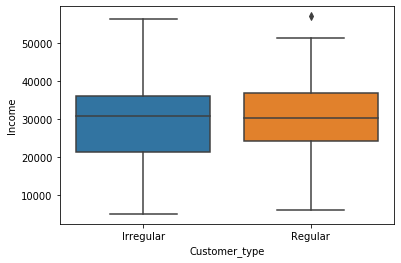

In [48]:
sns.boxplot(x='Customer_type',y='Income',data=df)

In [44]:
Irregular_Customer = np.array(df[df['Customer_type']=='Irregular']['Income'])
Regular_Customer = np.array(df[df['Customer_type']=='Regular']['Income'])


In [45]:
shapiro(Irregular_Customer)

(0.9936540126800537, 0.9891098141670227)

In [46]:
shapiro(Regular_Customer)

(0.9975496530532837, 0.9886366724967957)

In [47]:
ttest_ind(Irregular_Customer,Regular_Customer)

Ttest_indResult(statistic=-0.2811492874726788, pvalue=0.7788178055635818)

In [ ]:
Null hypothesis is Accepted as pvalue is high

In [50]:
shapiro(df['Deposit'])

(0.9948977828025818, 0.5275180339813232)

In [51]:
ttest_1samp(df['Deposit'],15500)

Ttest_1sampResult(statistic=0.31763635958734804, pvalue=0.7510128288252916)

In [ ]:
#Null hypo is accepted and Expectations matches

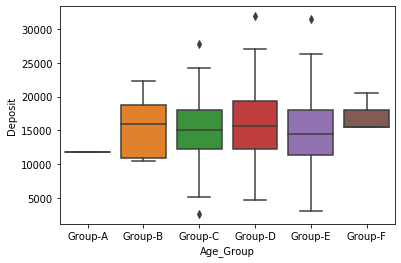

In [52]:
sns.boxplot(x='Age_Group',y='Deposit',data=df)
plt.show()

In [ ]:
#Anova test

In [53]:
mod=ols('Deposit ~ Age_Group',data=df).fit()
aov_table=sm.stats.anova_lm(mod,typ=2)
print(aov_table)

                 sum_sq     df         F    PR(>F)
Age_Group  5.336406e+07    5.0  0.392541  0.853745
Residual   7.014766e+09  258.0       NaN       NaN


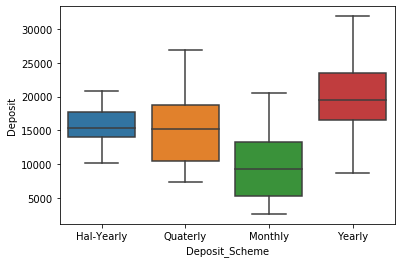

In [55]:
sns.boxplot(x='Deposit_Scheme',y='Deposit',data=df)
plt.show()


#siilar to income pattern

In [56]:
mod=ols('Deposit ~ Deposit_Scheme',data=df).fit()
aov_table=sm.stats.anova_lm(mod,typ=2)
print(aov_table)

                      sum_sq     df          F        PR(>F)
Deposit_Scheme  1.964786e+09    3.0  33.366631  2.808481e-18
Residual        5.103345e+09  260.0        NaN           NaN


In [ ]:
#Tucky test - Post hoc

In [57]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(df['Deposit'],df['Deposit_Scheme']))

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1    group2   meandiff  p-adj    lower      upper    reject
------------------------------------------------------------------
Hal-Yearly  Monthly -5822.5472  0.001 -8407.8468 -3237.2476   True
Hal-Yearly Quaterly  -542.3653 0.8297 -2269.8802  1185.1496  False
Hal-Yearly   Yearly  4421.7235  0.001  2336.8278  6506.6192   True
   Monthly Quaterly  5280.1819  0.001  2826.1267  7734.2371   True
   Monthly   Yearly 10244.2707  0.001  7526.7591 12961.7823   True
  Quaterly   Yearly  4964.0888  0.001  3044.3485  6883.8292   True
------------------------------------------------------------------


In [ ]:
Income vs Deposit_scheme and Deposit vs Deposit_scheme are having similar graphs/boxplots

So we can infer that Income and Deposit are highly correlated

In [58]:
df[['Income','Deposit']].corr()

,Income,Deposit
Income,1.000000,0.908407
Deposit,0.908407,1.000000


In [60]:
np.corrcoef(df['Income'],df['Deposit'])

array([[1.        , 0.90840697],
       [0.90840697, 1.        ]])

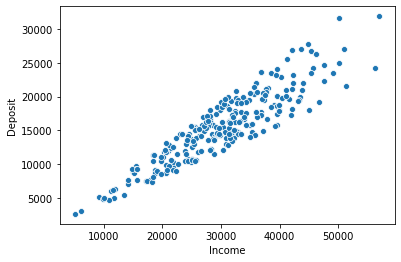

In [64]:
sns.scatterplot(x='Income',y='Deposit',data=df)
plt.show()

#Highly +ve correlation

In [66]:
CT=pd.crosstab(df['Deposit_Scheme'],df['Age_Group'])


In [67]:
CT

Age_Group,Group-A,Group-B,Group-C,Group-D,Group-E,Group-F
Deposit_Scheme,,,,,,
Hal-Yearly,0,3,15,41,13,0
Monthly,0,0,5,15,6,1
Quaterly,1,5,15,71,19,2
Yearly,0,3,11,29,9,0


In [68]:
15/36,15/36

(0.4166666666666667, 0.4166666666666667)

In [ ]:
Do the propotions test and dont look at the numbers

In [ ]:
Quarterly Deposits are more than compared to all other.

In [69]:
chi2_contingency(CT)

(9.050904513179914,
 0.8748407909784324,
 15,
 array([[ 0.27272727,  3.        , 12.54545455, 42.54545455, 12.81818182,
          0.81818182],
        [ 0.10227273,  1.125     ,  4.70454545, 15.95454545,  4.80681818,
          0.30681818],
        [ 0.4280303 ,  4.70833333, 19.68939394, 66.77272727, 20.11742424,
          1.28409091],
        [ 0.1969697 ,  2.16666667,  9.06060606, 30.72727273,  9.25757576,
          0.59090909]]))

In [70]:
CT

Age_Group,Group-A,Group-B,Group-C,Group-D,Group-E,Group-F
Deposit_Scheme,,,,,,
Hal-Yearly,0,3,15,41,13,0
Monthly,0,0,5,15,6,1
Quaterly,1,5,15,71,19,2
Yearly,0,3,11,29,9,0


In [71]:
#group c

15/46,5/46,15/46,11/46

(0.32608695652173914,
 0.10869565217391304,
 0.32608695652173914,
 0.2391304347826087)

In [72]:
#group d

41/156,15/156,71/156,29/156

(0.26282051282051283,
 0.09615384615384616,
 0.4551282051282051,
 0.1858974358974359)

In [73]:
#group e

13/47,6/47,19/47,9/47

(0.2765957446808511,
 0.1276595744680851,
 0.40425531914893614,
 0.19148936170212766)

In [ ]:
Difference is within acceptable difference

In [ ]:
#see this 2:18:00

In [ ]:
Q11.Does there exist any relationship between Age Group & Customer type

#Both are categorical so propotions and more than 2 groups so we go for chi2_contigency()

In [76]:
CT=pd.crosstab(df['Customer_type'],df['Age_Group'])
CT

Age_Group,Group-A,Group-B,Group-C,Group-D,Group-E,Group-F
Customer_type,,,,,,
Irregular,1,4,39,11,3,2
Regular,0,7,7,145,44,1


In [77]:
#Irregular in C and D
39/46,11/156

(0.8478260869565217, 0.07051282051282051)

In [ ]:
#Group C - 25-30 for example there are more propotions of irregular customers
#Group D - 35-40 for example there are more propotions of regular customers

In [78]:
chi2_contingency(CT)

(137.70576068469086,
 5.498541441859924e-28,
 5,
 array([[  0.22727273,   2.5       ,  10.45454545,  35.45454545,
          10.68181818,   0.68181818],
        [  0.77272727,   8.5       ,  35.54545455, 120.54545455,
          36.31818182,   2.31818182]]))

In [ ]:
5.498541441859924e-28<0.05 so Ha holds good

In [79]:
CT=pd.crosstab(df['Customer_type'],df['Deposit_Scheme'])
CT

Deposit_Scheme,Hal-Yearly,Monthly,Quaterly,Yearly
Customer_type,,,,
Irregular,16,5,23,16
Regular,56,22,90,36


In [80]:
chi2_contingency(CT)

(2.5601362063621305,
 0.4645210818775648,
 3,
 array([[16.36363636,  6.13636364, 25.68181818, 11.81818182],
        [55.63636364, 20.86363636, 87.31818182, 40.18181818]]))

In [ ]:
Ho holds good.

In [81]:
shapiro(df['Income2'])

(0.9964473247528076, 0.819494366645813)

In [ ]:
#high pvalue so Data is normal

In [82]:
ttest_1samp(df['Income2'],25000)

Ttest_1sampResult(statistic=0.04652823662732198, pvalue=0.9629245392466856)

(array([ 3., 10., 34., 42., 54., 45., 42., 16., 15.,  3.]),
 array([ 5104. ,  6700.1,  8296.2,  9892.3, 11488.4, 13084.5, 14680.6,
        16276.7, 17872.8, 19468.9, 21065. ]),
 <a list of 10 Patch objects>)

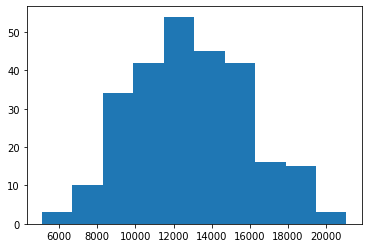

In [86]:
plt.hist(df.Deposit2)


In [83]:
shapiro(df['Deposit2'])

(0.9934213161468506, 0.30017945170402527)

In [87]:
ttest_1samp(df['Deposit2'],13000)

Ttest_1sampResult(statistic=-0.45360610788498795, pvalue=0.6504864132590965)

In [ ]:
Q15.Is there any effect of Corona on Income



In [88]:
shapiro(df['Income'])

(0.9979685544967651, 0.9867026805877686)

In [89]:
np.mean(df['Income'])

30104.583333333332

In [90]:
shapiro(df['Income2'])

(0.9964473247528076, 0.819494366645813)

In [91]:
np.mean(df['Income2'])

25014.545454545456

In [96]:
ttest_rel(df['Income'],df['Income2'])

Ttest_relResult(statistic=7.3845805999351475, pvalue=2.0214409662318323e-12)

In [ ]:
#Rejects Null hypothesis is Rejected which mean Covid had an Effect on Income

In [ ]:
16.Is there any effect of Corona on Deposit

In [92]:
shapiro(df['Deposit'])

(0.9948977828025818, 0.5275180339813232)

In [93]:
np.mean(df['Deposit'])

15601.345075757581

In [94]:
shapiro(df['Deposit2'])

(0.9934213161468506, 0.30017945170402527)

In [95]:
np.mean(df['Deposit2'])

12915.172348484848

In [97]:
ttest_rel(df['Deposit'],df['Deposit2'])

Ttest_relResult(statistic=6.9895298325640995, pvalue=2.266359033247305e-11)

In [ ]:
#Rejects Null hypothesis is Rejected which mean Covid had an Effect on Deposit